In [1]:
import pandas as pd
df = pd.read_csv("Hospital ER.csv")

In [3]:
print(df.head()) #wiew few first rows

                  date   patient_id patient_gender  patient_age  \
0  2020-03-20 08:47:01  145-39-5406              M           69   
1  2020-06-15 11:29:36  316-34-3057              M            4   
2  2020-06-20 09:13:13  897-46-3852              F           56   
3  2020-02-04 22:34:29  358-31-9711              F           24   
4  2020-09-04 17:48:27  289-26-0537              M            5   

   patient_sat_score patient_first_inital patient_last_name  \
0               10.0                    H         Glasspool   
1                NaN                    X           Methuen   
2                9.0                    P         Schubuser   
3                8.0                    U          Titcombe   
4                NaN                    Y       Gionettitti   

                    patient_race  patient_admin_flag  patient_waittime  \
0                          White               False                39   
1  Native American/Alaska Native                True                27

In [5]:
df.info() #check for data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  9216 non-null   object 
 1   patient_id            9216 non-null   object 
 2   patient_gender        9216 non-null   object 
 3   patient_age           9216 non-null   int64  
 4   patient_sat_score     2517 non-null   float64
 5   patient_first_inital  9216 non-null   object 
 6   patient_last_name     9216 non-null   object 
 7   patient_race          9216 non-null   object 
 8   patient_admin_flag    9216 non-null   bool   
 9   patient_waittime      9216 non-null   int64  
 10  department_referral   3816 non-null   object 
dtypes: bool(1), float64(1), int64(2), object(7)
memory usage: 729.1+ KB


In [23]:
df.isnull().sum()

date                    0
patient_id              0
patient_gender          0
patient_age             0
patient_sat_score       0
patient_first_inital    0
patient_last_name       0
patient_race            0
patient_admin_flag      0
patient_waittime        0
department_referral     0
age_group               0
month_year              0
dtype: int64

In [6]:
import pandas as pd

# Assuming your DataFrame is named df
df['date'] = pd.to_datetime(df['date'])

# Verify the conversion
print(df['date'].dtype)  # Should output: datetime64[ns]

datetime64[ns]


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  9216 non-null   datetime64[ns]
 1   patient_id            9216 non-null   object        
 2   patient_gender        9216 non-null   object        
 3   patient_age           9216 non-null   int64         
 4   patient_sat_score     2517 non-null   float64       
 5   patient_first_inital  9216 non-null   object        
 6   patient_last_name     9216 non-null   object        
 7   patient_race          9216 non-null   object        
 8   patient_admin_flag    9216 non-null   bool          
 9   patient_waittime      9216 non-null   int64         
 10  department_referral   3816 non-null   object        
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 729.1+ KB


In [9]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [10]:
df.duplicated().sum()

np.int64(0)

In [13]:
import pandas as pd

# Assuming your DataFrame is named df
average_wait_time = df['patient_waittime'].mean()

print(f"Average Wait Time: {average_wait_time:.2f} minutes")

Average Wait Time: 35.26 minutes


In [14]:
# Group by department and calculate average wait time
wait_time_by_department = df.groupby('department_referral')['patient_waittime'].mean().reset_index()

# Sort by average wait time (descending)
wait_time_by_department = wait_time_by_department.sort_values(by='patient_waittime', ascending=False)

print(wait_time_by_department)

  department_referral  patient_waittime
3           Neurology         36.803109
5       Physiotherapy         36.565217
1    Gastroenterology         35.831461
0          Cardiology         35.354839
7             Unknown         35.293148
4         Orthopedics         34.982915
2    General Practice         34.912500
6               Renal         34.697674


In [15]:
# Extract month and year from the 'date' column
df['month_year'] = df['date'].dt.to_period('M')

# Group by month/year and calculate average wait time
wait_time_over_time = df.groupby('month_year')['patient_waittime'].mean().reset_index()

print(wait_time_over_time)

   month_year  patient_waittime
0     2019-04         34.901879
1     2019-05         34.429167
2     2019-06         35.581028
3     2019-07         34.719828
4     2019-08         36.392713
5     2019-09         34.268657
6     2019-10         34.933063
7     2019-11         35.185345
8     2019-12         34.764826
9     2020-01         36.323587
10    2020-02         36.670534
11    2020-03         35.879447
12    2020-04         35.044776
13    2020-05         35.809249
14    2020-06         35.507216
15    2020-07         35.198770
16    2020-08         35.113208
17    2020-09         35.060086
18    2020-10         34.050955


In [16]:
# Group by gender and calculate average wait time
wait_time_by_gender = df.groupby('patient_gender')['patient_waittime'].mean().reset_index()

# Group by age and calculate average wait time
wait_time_by_age = df.groupby('patient_age')['patient_waittime'].mean().reset_index()

print(wait_time_by_gender)
print(wait_time_by_age)

  patient_gender  patient_waittime
0              F         35.105416
1              M         35.397450
2             NC         37.166667
    patient_age  patient_waittime
0             1         32.475248
1             2         33.576000
2             3         34.427350
3             4         32.421488
4             5         37.654545
..          ...               ...
74           75         33.760000
75           76         37.743363
76           77         35.403846
77           78         35.370079
78           79         33.883333

[79 rows x 2 columns]


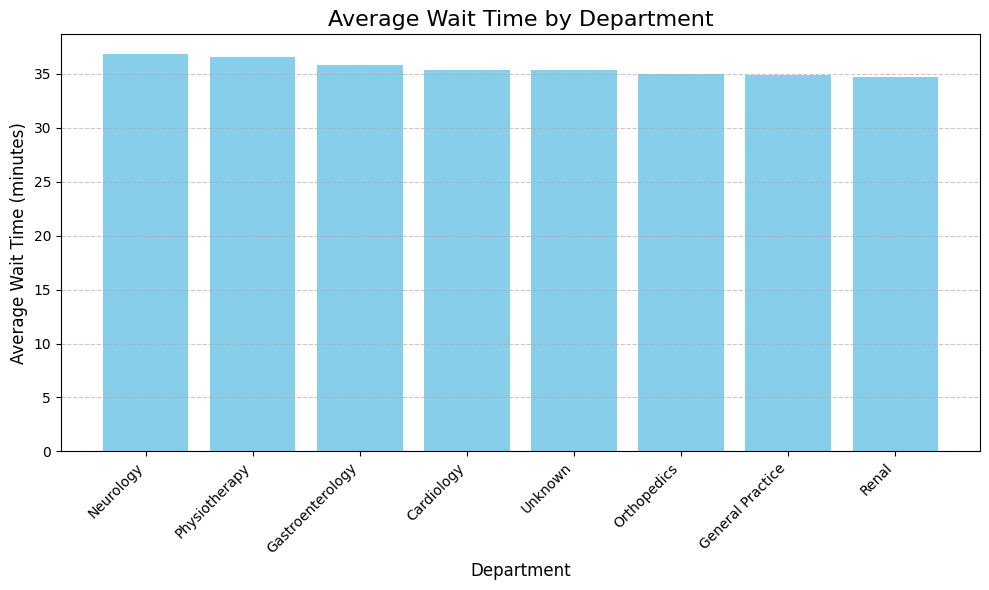

In [18]:
#import matplotlib.pyplot as plt
#. Bar Chart: Average Wait Time by Department

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(wait_time_by_department['department_referral'], wait_time_by_department['patient_waittime'], color='skyblue')
plt.title('Average Wait Time by Department', fontsize=16)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Average Wait Time (minutes)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

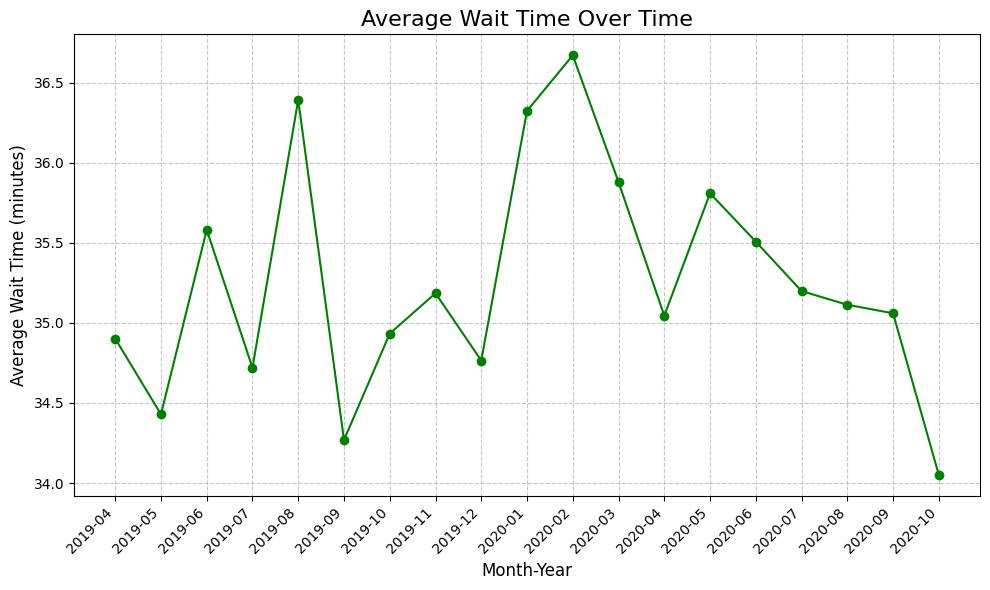

In [21]:

#Line Chart: Average Wait Time Over Time
plt.figure(figsize=(10, 6))
plt.plot(wait_time_over_time['month_year'].astype(str), wait_time_over_time['patient_waittime'], marker='o', color='green')
plt.title('Average Wait Time Over Time', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Average Wait Time (minutes)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

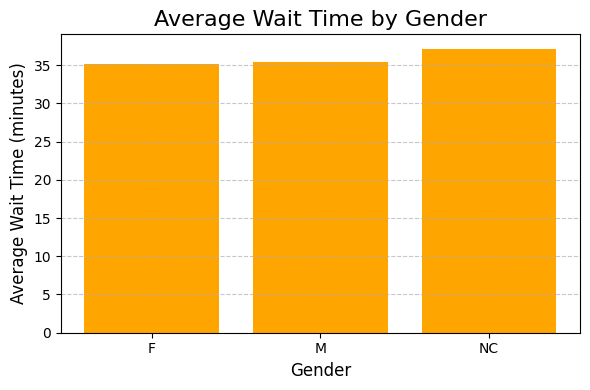

In [22]:
#Bar Chart: Average Wait Time by Gender

plt.figure(figsize=(6, 4))
plt.bar(wait_time_by_gender['patient_gender'], wait_time_by_gender['patient_waittime'], color='orange')
plt.title('Average Wait Time by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Average Wait Time (minutes)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Average Patient Satisfaction Score: 5.00


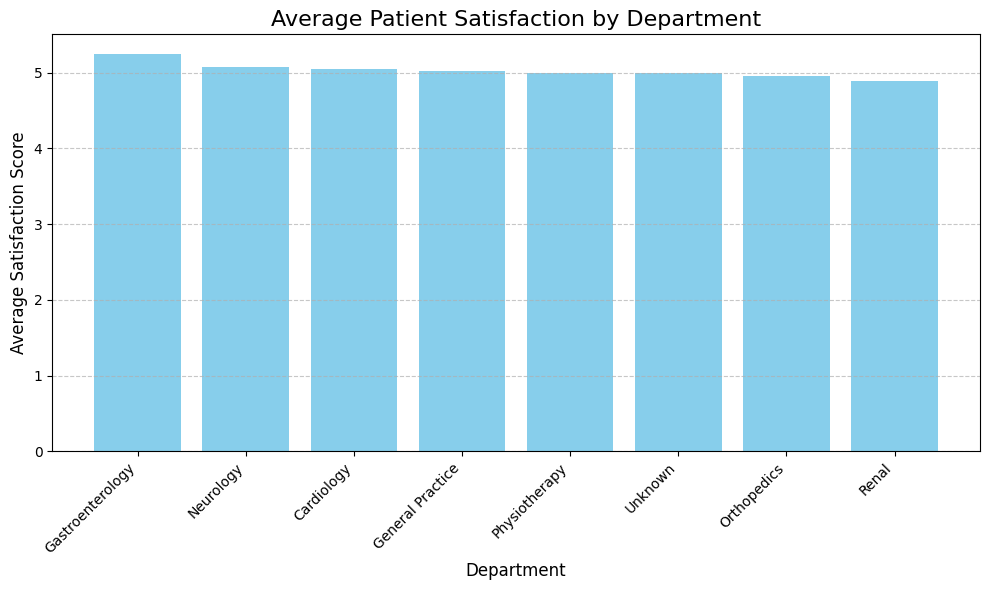

In [26]:
# Patient Satisfaction


#Calculate the average satisfaction score.

#Analyze satisfaction scores by department, wait time, and demographics.

#Visualize the results.


import matplotlib.pyplot as plt

# Calculate average satisfaction score
average_satisfaction = df['patient_sat_score'].mean()
print(f"Average Patient Satisfaction Score: {average_satisfaction:.2f}")

# Analyze satisfaction by department
satisfaction_by_department = df.groupby('department_referral')['patient_sat_score'].mean().reset_index()
satisfaction_by_department = satisfaction_by_department.sort_values(by='patient_sat_score', ascending=False)

# Visualize satisfaction by department
plt.figure(figsize=(10, 6))
plt.bar(satisfaction_by_department['department_referral'], satisfaction_by_department['patient_sat_score'], color='skyblue')
plt.title('Average Patient Satisfaction by Department', fontsize=16)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Average Satisfaction Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()  

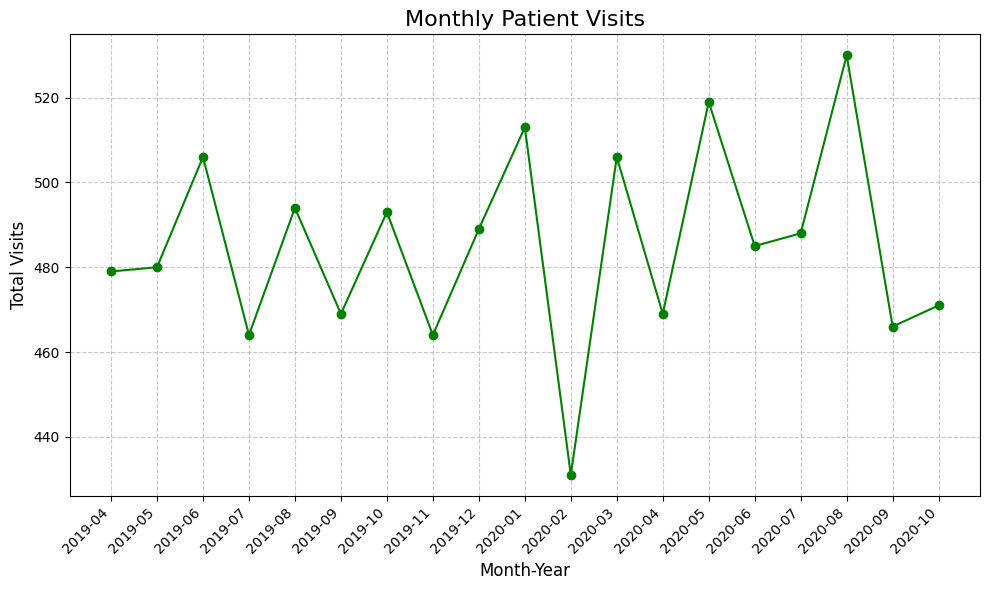

In [27]:
# Total Patient Visits Monthly
#Objective: Analyze the monthly trends in patient visits to understand healthcare demand over time.


#Extract the month and year from the date column.

#Group by month and count the number of visits.

#Visualize the trend.

# Extract month and year
df['month_year'] = df['date'].dt.to_period('M')

# Count patient visits by month
monthly_visits = df.groupby('month_year').size().reset_index(name='total_visits')

# Visualize monthly visits
plt.figure(figsize=(10, 6))
plt.plot(monthly_visits['month_year'].astype(str), monthly_visits['total_visits'], marker='o', color='green')
plt.title('Monthly Patient Visits', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Total Visits', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

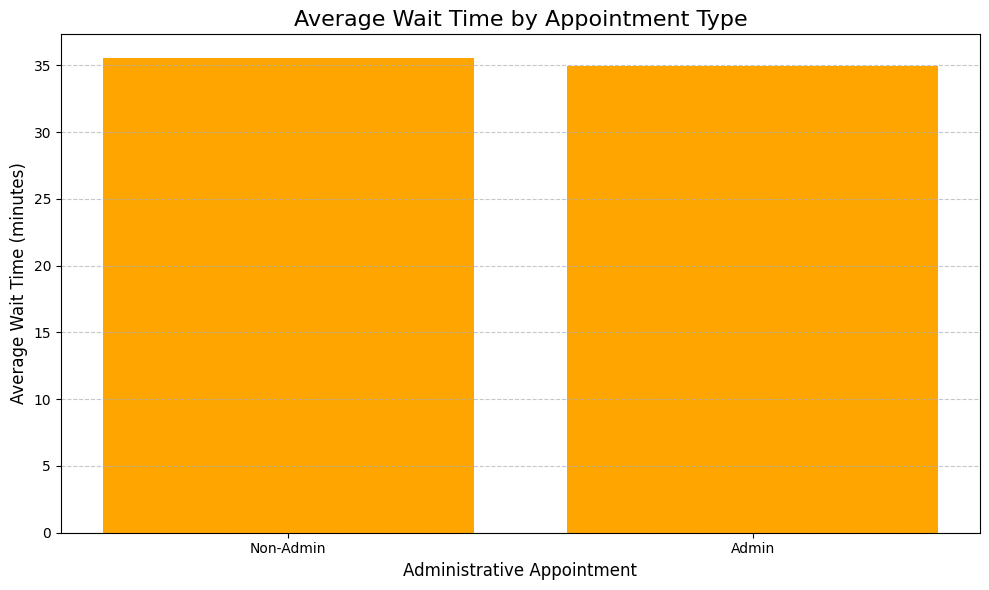

In [28]:
#Administrative vs. Non-Administrative Appointments
#Objective: Compare wait times and satisfaction scores between administrative and non-administrative appointments.


#Group by patient_admin_flag and calculate average wait time and satisfaction score.

#Visualize the results.
# Group by administrative flag
admin_stats = df.groupby('patient_admin_flag').agg(
    average_wait_time=('patient_waittime', 'mean'),
    average_satisfaction=('patient_sat_score', 'mean')
).reset_index()

# Visualize wait times
plt.figure(figsize=(10, 6))
plt.bar(admin_stats['patient_admin_flag'].astype(str), admin_stats['average_wait_time'], color='orange')
plt.title('Average Wait Time by Appointment Type', fontsize=16)
plt.xlabel('Administrative Appointment', fontsize=12)
plt.ylabel('Average Wait Time (minutes)', fontsize=12)
plt.xticks([0, 1], ['Non-Admin', 'Admin'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

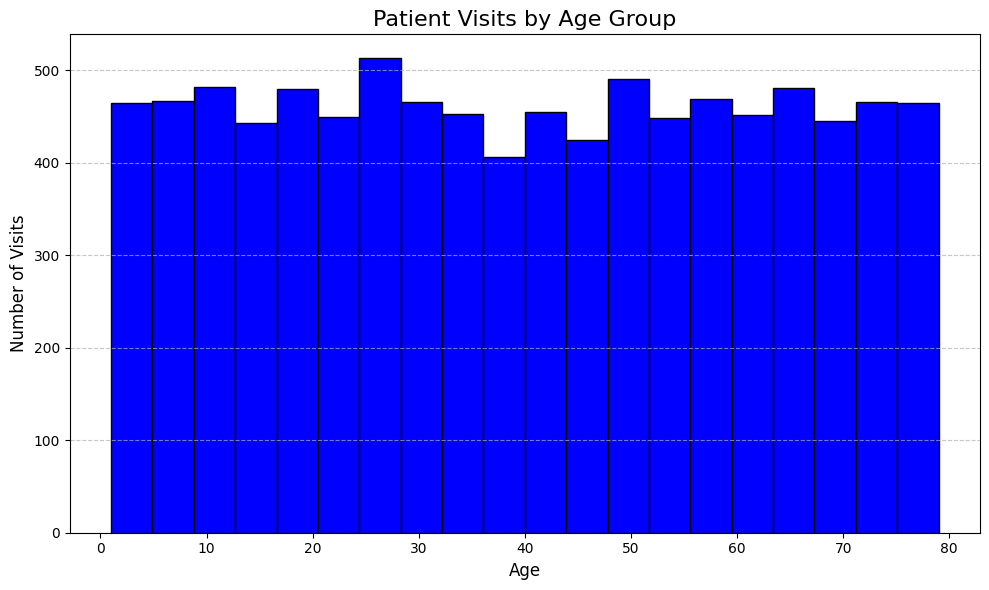

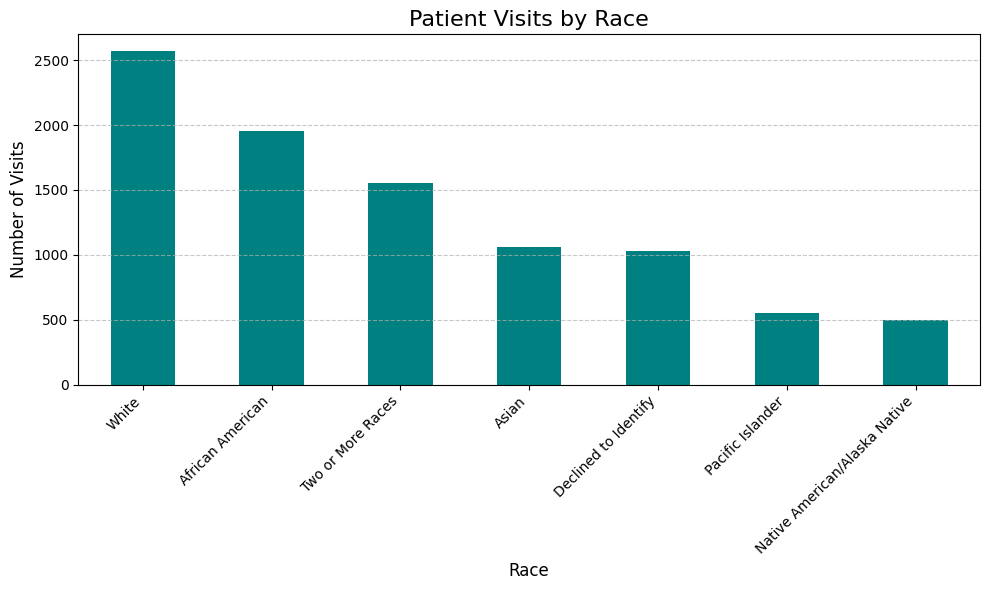

In [29]:
#Patient Visits by Age Group and Race
#Objective: Explore the distribution of patient visits across age groups and races.


#Group by patient_age and patient_race to count visits.

#Visualize the distribution.

# Group by age and race
age_race_visits = df.groupby(['patient_age', 'patient_race']).size().reset_index(name='total_visits')

# Visualize visits by age group
plt.figure(figsize=(10, 6))
plt.hist(df['patient_age'], bins=20, color='blue', edgecolor='black')
plt.title('Patient Visits by Age Group', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Visits', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualize visits by race
race_visits = df['patient_race'].value_counts()
plt.figure(figsize=(10, 6))
race_visits.plot(kind='bar', color='teal')
plt.title('Patient Visits by Race', fontsize=16)
plt.xlabel('Race', fontsize=12)
plt.ylabel('Number of Visits', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
Key Insights
Patient Satisfaction:

Identify departments with the highest and lowest satisfaction scores.

Correlate satisfaction with wait times and appointment types.

Monthly Visits:

Identify seasonal trends or spikes in patient visits.

Administrative Appointments:

Compare wait times and satisfaction between administrative and non-administrative appointments.

Referrals vs. Walk-Ins:

Analyze how walk-in patients impact wait times and satisfaction.

Age and Race Distribution:

Understand the diversity of patient demographics and tailor services accordingly.